In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [55]:
# Read the file named "pci_thesis_cleaned.csv" into a Pandas dataframe

# Drop S.N and save to new csv file


df = pd.read_csv('18-iri.csv')
df.drop(['S.N'],axis=1,inplace=True)

# df.drop(159,axis=0,inplace=True)

df.replace({'.0.16': 0.16, '0..66': 0.66, '..45': 0.45},inplace=True)

df.dropna(axis=0, inplace=True)

# df.drop(df[df['AC3'] == '#VALUE!'].index[0], axis= 0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')


df.to_csv('18-iri-cleaned.csv',index=False)
# Load the data set
df = pd.read_csv('18-iri-cleaned.csv')

any nan = False
all finite = True


In [56]:
# Take a quick look at the dataset
df.head()

,AC1,AC2,AC3,BE1,BE2,BE3,D1,D2,D3,F1,F2,F3,G1,G2,G3,H1,H2,H3,IRI
0,0.000,0.080,0.000,0.230,0.000,0.450,0.000,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.130
1,0.420,0.060,0.560,0.120,0.460,0.150,0.000,0.620,0.000,0.000,0.000,0.000,0.000,0.050,0.000,0.000,0.000,0.000,3.750
2,0.000,0.660,0.000,0.320,0.660,0.000,0.000,0.430,0.120,0.000,0.000,0.000,0.000,0.000,0.000,0.110,0.660,0.000,3.480
3,0.250,1.191,0.662,0.000,0.150,0.320,0.021,0.216,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.850
4,0.000,0.000,0.000,0.550,0.330,0.640,0.210,0.550,0.050,0.000,0.000,0.000,0.000,0.150,0.660,0.000,0.660,0.000,3.940


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC1     283 non-null    float64
 1   AC2     283 non-null    float64
 2   AC3     283 non-null    float64
 3   BE1     283 non-null    float64
 4   BE2     283 non-null    float64
 5   BE3     283 non-null    float64
 6   D1      283 non-null    float64
 7   D2      283 non-null    float64
 8   D3      283 non-null    float64
 9   F1      283 non-null    float64
 10  F2      283 non-null    float64
 11  F3      283 non-null    float64
 12  G1      283 non-null    float64
 13  G2      283 non-null    float64
 14  G3      283 non-null    float64
 15  H1      283 non-null    float64
 16  H2      283 non-null    float64
 17  H3      283 non-null    float64
 18  IRI     283 non-null    float64
dtypes: float64(19)
memory usage: 42.1 KB


In [58]:
df.describe()

,AC1,AC2,AC3,BE1,BE2,BE3,D1,D2,D3,F1,F2,F3,G1,G2,G3,H1,H2,H3,IRI
count,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000,283.000
mean,0.395,0.708,0.611,0.151,0.435,0.380,0.157,0.251,0.204,0.032,0.020,0.023,0.033,0.066,0.079,0.064,0.194,0.104,5.070
std,0.542,1.088,1.023,0.368,0.729,0.655,0.277,0.400,0.389,0.129,0.064,0.102,0.134,0.195,0.217,0.228,0.529,0.337,2.634
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.560
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.950
50%,0.150,0.360,0.300,0.000,0.110,0.000,0.000,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.900
75%,0.610,1.110,0.825,0.120,0.620,0.526,0.206,0.363,0.230,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.560
max,3.050,11.970,12.500,2.400,5.600,4.560,1.800,2.600,3.200,1.200,0.620,1.010,1.200,1.620,2.000,2.220,3.200,3.080,16.250


#### Creation of Linear Regression Objects

In [59]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['IRI'],axis=1)

# Choose the response variable 'y' 
y = df.IRI



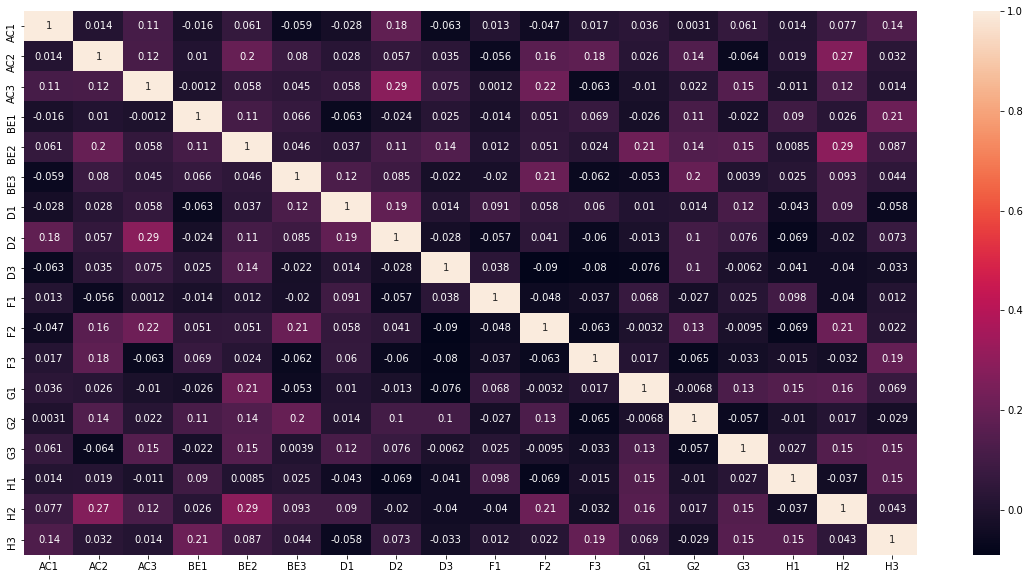

In [60]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = X.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

In [61]:

# sns.pairplot(X)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=25)

In [63]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [64]:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X_train,y_train)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
# print(multi_coef)

print(f"test_r2 = {multi_linear.score(X_test,y_test)}")
print(f"train_r2 = {multi_linear.score(X_train,y_train)}")


test_r2 = 0.5156554784644096
train_r2 = 0.5414078141853652


#### Printing the individual $\beta$ values

In [65]:
print(f"Coefficients: {multi_coef}")
print(f"Intercept: {multi_linear.intercept_}")



Coefficients: [ 0.61214696  0.12508914  0.51981757  0.20889708  0.26069436  0.42099329
  0.81268151  0.12632228  1.71991986  3.30867566  8.94937405 10.01752575
 -0.31254476  0.10047679  1.81017193  0.09475724  0.3711244   0.69231715]
Intercept: 2.7088772223171658


line: y = 0.4150691201645587 * x + 2.6508769419174274


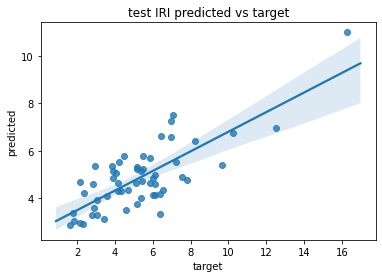

In [66]:

x_test_prediction = multi_linear.predict(X_test)
ax = sns.regplot(x=y_test, y=x_test_prediction)
ax.set(title = 'test IRI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

line: y = 0.5414078141853657 * x + 2.300205062273871


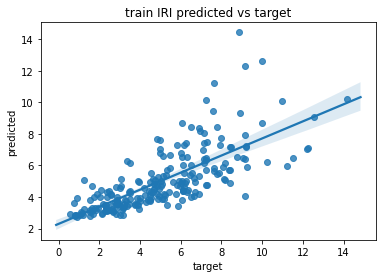

In [67]:
x_train_prediction = multi_linear.predict(X_train)
ax = sns.regplot(x=y_train, y= x_train_prediction)
ax.set(title = 'train IRI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

In [120]:
# Now using the stat

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

# Assuming you have your data stored in X and y
# X should be a 2-dimensional array (or DataFrame) containing your features
# y should be a 1-dimensional array (or Series) containing your target

# Fit the linear regression model using sklearn
# sklearn_model = LinearRegression()
# sklearn_model.fit(X, y)

# Add a constant term to the features (intercept) for statsmodels
X_train_with_constant = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
statsmodel = sm.OLS(y_train, X_train_with_constant)
results = statsmodel.fit()

# Access the p-values for each coefficient
p_values = results.pvalues
pd.options.display.float_format = '{:.3f}'.format
greater_than_01 = p_values[p_values.index[p_values > 0.1]]
print(p_values)
print("\n\n p_values greater than 0.01")
print(greater_than_01)
count = greater_than_01.count()

filtered = filter(lambda x: x > 0.1 , p_values)
print((pd.Series(filtered)))
print(p_values)


0   3.112
dtype: float64

In [ ]:

z = pd.DataFrame({'AC1': [ 0.26],
 'AC2': [ 1.2],
 'AC3': [ 0.12],
 'BE1': [ 0.151],
 'BE2': [ 0.0],
 'BE3': [ 0.0],
 'D1': [ 0.0],
 'D2': [ 0.0],
 'D3': [ 0.0],
 'F1': [ 0.0],
 'F2': [ 0.0],
 'F3': [ 0.0],
 'G1': [ 0.0],
 'G2': [ 0.0],
 'G3': [ 0.0],
 'H1': [ 0.0],
 'H2': [ 0.0],
 'H3': [ 0.0]})
z = sm.add_constant(z, has_constant="add")
results.predict((z))

In [103]:

# # Initialize a list to store the beta values for each linear regression model
# linear_coef = []
# linear_score = []

# # Loop over all the predictors
# # In each loop "i" holds the name of the predictor 
# for i in X_train:
    
#     # Set the current predictor as the variable x_train
#     x_train = X_train[[i]]

#     # Create a linear regression object
#     linreg = LinearRegression()

#     # Fit the model with training data 
#     # Remember to choose only one column at a time i.e. given by x_train (not X_train)
#     linreg.fit(x_train,y_train)
    
#     # Add the coefficient value of the model to the list
#     linear_coef.append(linreg.coef_)
#     linear_score.append(linreg.score(X_test[[i]], y_test))
    
# linear_coef
# linear_score
